# Data Anaysis Hackathon Portion 

##### Plus Visualizations with matplotlib



Setting up for the experiment:

In [180]:
import matplotlib.pyplot as plt
import seaborn
import csv
import numpy as np

%matplotlib inline

LANGUAGES = ['chinese','japanese','french','german','italian','korean','portuguese','russian','spanish','thai']

In [181]:
dataDirectory = './kld/'

# Use the following directory 
# for entropy data calculated using individual characters (only for chinese/japanese/korean/thai)

# dataDirectory = './data/kld/'

In [182]:

# Function that returns a (tuple) of [arrays] of: 
# ([original E], [translated E], [changeInE]) for a given language 
def getStats(language): 
    origE = []
    transE = []
    changeInE = []
    englishRatings = []
    translatedRatings = []

    with open(dataDirectory + language + '-entropy.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                # For 'none' vals in conversions
                try: 
                    origE.append(float(row[11]))
                    transE.append(float(row[12]))
                    changeInE.append(float(row[12]) - float(row[11]))
                except: 
                    pass
                
                try: 
                    englishRatings.append(float(row[3]))
                    translatedRatings.append(float(row[7]))
                except: 
                    pass

    return origE, transE, changeInE, englishRatings, translatedRatings



def average(list):
    if len(list) == 0: return 0
    return sum(list) / len(list)

                                      [0]      [1]       [2]        [3]            [4]
#### Get a data dictionary: {language => (original Entropy, translated E, changeInE, englishRatings, translatedRatings)}

In [183]:
languageStats = {}

for lang in LANGUAGES:
    languageStats[lang] = (getStats(lang))
    

### Avergage Change in Entropy __VS__ Language 

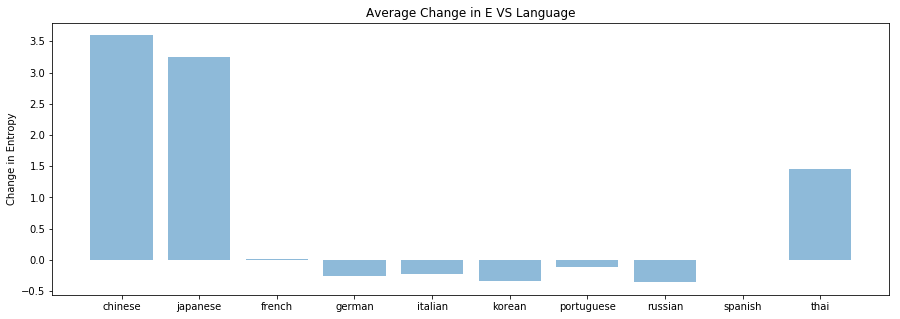

In [184]:
plt.figure(figsize=(15,5))

# kld VS. kudos 

x_pos = np.arange(len(LANGUAGES)) # Set label locations
averageChangeInE = [average(languageStats[lang][2]) for lang in languageStats]

plt.bar(x_pos, averageChangeInE, align='center', alpha=0.5)
# plt.bar(y_pos, averageChangeInE, align='center', alpha=0.5)
plt.xticks(x_pos, LANGUAGES)
plt.ylabel('Change in Entropy')
plt.title('Average Change in E VS Language')

plt.show()

### Avergage Post Rating __VS__ Language 

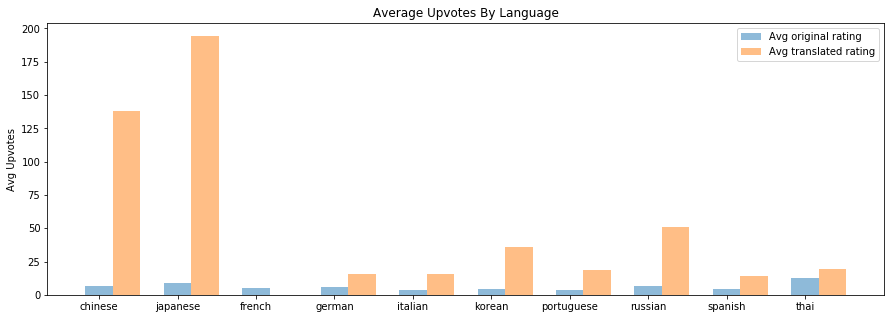

In [185]:
plt.figure(figsize=(15,5))


x_pos = np.arange(len(LANGUAGES)) # Set label locations
averageOriginalKudos = [average(languageStats[lang][3]) for lang in languageStats]
averageTranslatedKudos = [average(languageStats[lang][4]) for lang in languageStats]
width = 0.35  # Bar width 

plt.bar(x_pos, averageOriginalKudos, width, align='center', alpha=0.5, label='Avg original rating')
plt.bar(x_pos+.35, averageTranslatedKudos, width, align='center', alpha=0.5, label='Avg translated rating')
# plt.bar(y_pos, averageChangeInE, align='center', alpha=0.5)
plt.xticks(x_pos, LANGUAGES)
plt.ylabel('Avg Upvotes')
plt.title('Average Upvotes By Language')

plt.legend()

plt.show()


Issues: 
    * Scraping: upvote fields for "french" are badly formatted 

Building a Basic Graph:

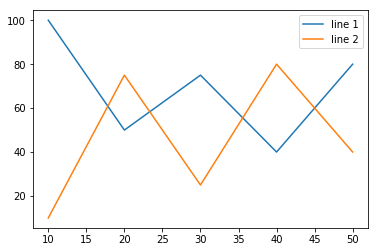

In [186]:

y1_values = [100, 50, 75, 40, 80]

plt.plot(x_values, y1_values)

# use the same x-values but different y-values
y2_values = [10, 75, 25, 80, 40]

plt.plot(x_values, y2_values )

plt.legend(['line 1','line 2'])
plt.show()
